# Model

In [1]:
# import required libraries

import pandas as pd # dataframes
import numpy as np #mathematical operations

# to visualise

import plotly.express as px # plotly
from wordcloud import WordCloud # wordclouds
import matplotlib.pyplot as plt #matplot
import seaborn as sns #seaborn

# preprocessing 

import re #Regular expressions
import nltk #NLP library
import spacy
import string
from bs4 import BeautifulSoup #HTML tags
from nltk.corpus import stopwords #english stopwords
#lematising
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

# Vectorisation

from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

# Treating class imbalanced data

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

# model building

from sklearn.model_selection import train_test_split

# algorithms

from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

# checking up with models

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
# confusion matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


<h3 style= "color:blue;"> Importing Data Set </h3>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# load your dataframe
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Research/Method 2 - Titles/preprocessed_title.csv",index_col=[0])

<h3 style= "color:blue;"> Have a look </h3>

In [4]:
#observing data frame
df.head()

,Title,classes
0,aarogya setu mobile application monitor mitiga...,6
1,online teach ict post covid,9
2,best method family plan text mining analysis m...,6
3,mobile industry impact sustainable goal,7
4,recommendation governance guide lawmaker regul...,1


In [ ]:
# do not run this!!!

# Calculate the frequency of each class
class_frequencies = df['fileclass'].value_counts().sort_values(ascending=False)

# Sort the classes in descending order based on frequency
sorted_classes = class_frequencies.index.tolist()

# Create a new DataFrame to store the reordered records
new_df = pd.DataFrame()

# Iterate through the sorted classes and append records to the new DataFrame
for class_label in sorted_classes:
    class_data = df[df['fileclass'] == class_label]
    new_df = pd.concat([new_df, class_data])

# Reset the index of the new DataFrame
new_df = new_df.reset_index(drop=True)

<h3> Data types </h3>

In [5]:
#data types
df.dtypes

Title      object
classes     int64
dtype: object

In [9]:
# change both types into string
df['Title'] = df['Title'].astype('str')

<h3> Size </h3>

In [7]:
# spread of the data frame
print("No. of text files: ",df.shape[0])

No. of text files:  805


<h3> Spread of text files based on intervention areas </h3>

In [11]:
# Count the number of items per group
group_counts = df.groupby("classes").count()
group_counts=group_counts.reset_index()

# Create the bar chart
fig = px.bar(group_counts, x='classes', y='Title',color="classes")

# Show the chart
fig.show()

<h3> Treat duplicates </h3>

In [ ]:
# check if there are duplicates
df.duplicated(subset=['content']).any() #no duplicates

True

Which means there are duplicates at the moment.

In [ ]:
# remove duplicates, leaving the first record
df = df.drop_duplicates(subset=['content'],keep="first")

In [ ]:
# spread of the data frame after remocing duplicates
print("No. of text files: ",df.shape[0])

No. of text files:  615


In [ ]:
# spread of text files after removing duplicates
# Count the number of items per group
group_counts = df.groupby("fileclass").count()
group_counts=group_counts.reset_index()

# Create the bar chart
fig = px.bar(group_counts, x='fileclass', y='content',color="fileclass")

# Show the chart
fig.show()

<h3> Document term matrix</h3>

In [12]:
max_length = df['Title'].str.len().max()
print(max_length)

171


In [13]:
# Group the dataframe by the 'fileclass' column
grouped = df.groupby('classes')

# Create an empty dataframe to store the results
tfidf_df = pd.DataFrame()

# Iterate through each group
for name, group in grouped:
    # Apply the TfidfVectorizer to the 'content' column for the current group
    vectorizer = TfidfVectorizer(stop_words=None, max_features=200)
    tfidf = vectorizer.fit_transform(group['Title']).mean(axis=0)
    # Convert the matrix to a dataframe
    tfidf_df[name] = pd.Series(tfidf.tolist()[0], index=vectorizer.get_feature_names_out())


In [14]:
# observe the dataframe
tfidf_df

,0,1,2,3,4,5,6,7,8,9,10,11
abuse,0.058691,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006795,NaN,NaN,NaN
access,0.012540,NaN,NaN,NaN,0.013539,0.023503,NaN,0.017894,NaN,NaN,NaN,0.009998
adolescent,0.056147,NaN,NaN,0.014755,NaN,0.009044,NaN,0.015781,NaN,NaN,NaN,NaN
adult,0.016183,NaN,NaN,NaN,NaN,0.006490,NaN,0.006102,NaN,NaN,NaN,NaN
age,0.022108,0.01003,NaN,NaN,NaN,NaN,NaN,NaN,0.008216,0.0254,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
vaw,0.016129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vicitms,0.011777,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
voice,0.012540,NaN,NaN,0.010287,NaN,0.004397,0.004017,NaN,NaN,NaN,0.013987,NaN
wellbeing,0.009350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<h3 style= "color:blue;"> Check for class imbalanced nature </h3>

As you can see the data set is class imbalanced.




<b> Before moving ahead let's convert the fileclass into integer format, as it will make our work easy!!</b>

In [ ]:
# let's view how it is mapped

# Create a new dataframe with the class label mapping
class_mapping = pd.DataFrame({'class_label': list(classes.keys()), 'class_value': list(classes.values())})

# Print the class mapping dataframe
class_mapping

,class_label,class_value
0,ChildProtection,0
1,Cybersecurity,1
2,DataPrivacy,2
3,DataSystemsDevelopment,3
4,DigitalFinance,4
5,DigitalInclusion,5
6,DigitalInformatioServices,6
7,DigitalInfrastructure,7
8,DigitalLiteracy,8
9,DigitalServices,9


<b> Now we have to vectorise our content column </b>

In [ ]:
# vectorsing the content column
vectorizer = TfidfVectorizer(stop_words=None)
vectorized_df = vectorizer.fit_transform(df['Title'])
# defining the y label
y = df['classes']
y=y.to_frame()

<h3 style= "color:blue;"> Defining train and test set </h3>

In [50]:
# train test split
X_train, x_test, Y_train, y_test = train_test_split(vectorized_df,y,test_size=0.3,random_state=42)

<b> Finally we can get rid of class imbalanced data</b>

In [51]:
# treat class imbalanced data
ros = RandomOverSampler(random_state=42)
X_train, Y_train = ros.fit_resample(X_train, Y_train)

In [52]:
# visualise the class balanced data set
# Count the number of samples for each class in the oversampled dataset
class_counts = Y_train['classes'].value_counts()

# Create a bar chart using plotly
fig = px.bar(class_counts, x=class_counts.index, y=class_counts.values)
fig.show()

<h3 style= "color:blue;"> Fit  Models </h3>

<h3> Decision Trees </h3>

In [ ]:
# fit the model
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train.values.ravel())

# make predictions
pred_dt = dt.predict(x_test)

# print accuracy 
print("Accuracy %s" % accuracy_score(pred_dt,y_test))

In [47]:
print(classification_report(y_test,pred_dt))

              precision    recall  f1-score   support

           0       0.43      0.30      0.35        10
           1       0.50      0.17      0.25        12
           2       0.32      0.86      0.46         7
           3       0.04      0.04      0.04        27
           4       0.88      0.37      0.52        62
           5       0.20      0.24      0.22        29
           6       0.00      0.00      0.00        24
           7       0.25      0.08      0.12        13
           8       0.00      0.00      0.00         8
           9       0.17      0.06      0.09        16
          10       0.08      0.28      0.12        25
          11       0.07      0.11      0.09         9

    accuracy                           0.21       242
   macro avg       0.24      0.21      0.19       242
weighted avg       0.34      0.21      0.23       242



<h3> Naive Bayes </h3>

In [48]:
# fit the model
nb = MultinomialNB()
nb.fit(X_train, Y_train.values.ravel())

# make predictions 
pred_nb = nb.predict(x_test)

# print accuracy
print("Accuracy %s" % accuracy_score(pred_nb,y_test))

Accuracy 0.24380165289256198


In [49]:
print(classification_report(y_test,pred_nb))

              precision    recall  f1-score   support

           0       0.35      0.60      0.44        10
           1       0.29      0.42      0.34        12
           2       0.35      0.86      0.50         7
           3       0.28      0.19      0.22        27
           4       0.55      0.45      0.50        62
           5       0.04      0.03      0.04        29
           6       0.20      0.12      0.15        24
           7       0.00      0.00      0.00        13
           8       0.00      0.00      0.00         8
           9       0.10      0.12      0.11        16
          10       0.10      0.12      0.11        25
          11       0.00      0.00      0.00         9

    accuracy                           0.24       242
   macro avg       0.19      0.24      0.20       242
weighted avg       0.25      0.24      0.24       242



<h3> K-Nearest Neighbours </h3>

In [37]:
# fit the model
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train.values.ravel())

# make predictions
pred_knn = knn.predict(x_test)

# print accuracy
print("Accuracy %s" % accuracy_score(pred_knn,y_test))

Accuracy 0.2809917355371901


In [38]:
print(classification_report(y_test,pred_knn))

              precision    recall  f1-score   support

           0       0.60      0.60      0.60        10
           1       0.38      0.75      0.50        12
           2       0.50      0.29      0.36         7
           3       0.31      0.15      0.20        27
           4       0.58      0.50      0.54        62
           5       0.16      0.14      0.15        29
           6       0.19      0.17      0.18        24
           7       0.14      0.23      0.18        13
           8       0.00      0.00      0.00         8
           9       0.04      0.06      0.05        16
          10       0.21      0.16      0.18        25
          11       0.00      0.00      0.00         9

    accuracy                           0.28       242
   macro avg       0.26      0.25      0.24       242
weighted avg       0.31      0.28      0.29       242



<h3> Logistic Regression </h3>

In [27]:
# fit the model
lr = LogisticRegression()
lr.fit(X_train, Y_train.values.ravel())

# make predictions
pred_lr = lr.predict(x_test)

# print accuracy
print("Accuracy %s" % accuracy_score(pred_lr,y_test))

Accuracy 0.34297520661157027


In [28]:
print(classification_report(y_test,pred_lr))

              precision    recall  f1-score   support

           0       0.86      0.60      0.71        10
           1       0.78      0.58      0.67        12
           2       0.80      0.57      0.67         7
           3       0.29      0.33      0.31        27
           4       0.63      0.58      0.61        62
           5       0.33      0.28      0.30        29
           6       0.11      0.12      0.12        24
           7       0.11      0.15      0.12        13
           8       0.33      0.25      0.29         8
           9       0.00      0.00      0.00        16
          10       0.17      0.24      0.20        25
          11       0.00      0.00      0.00         9

    accuracy                           0.34       242
   macro avg       0.37      0.31      0.33       242
weighted avg       0.38      0.34      0.36       242



<h3> Ada Boost </h3>

In [29]:
# fit the model
ab = AdaBoostClassifier()
ab.fit(X_train, Y_train.values.ravel())

# make predictions
pred_ab = ab.predict(x_test)

# print accuracy
print("Accuracy %s" % accuracy_score(pred_ab,y_test))

Accuracy 0.16115702479338842


In [30]:
print(classification_report(y_test, pred_ab, zero_division=1))

              precision    recall  f1-score   support

           0       0.50      0.50      0.50        10
           1       0.67      0.17      0.27        12
           2       1.00      0.00      0.00         7
           3       1.00      0.00      0.00        27
           4       1.00      0.00      0.00        62
           5       0.13      1.00      0.23        29
           6       1.00      0.00      0.00        24
           7       1.00      0.00      0.00        13
           8       1.00      0.38      0.55         8
           9       1.00      0.00      0.00        16
          10       1.00      0.00      0.00        25
          11       1.00      0.00      0.00         9

    accuracy                           0.16       242
   macro avg       0.86      0.17      0.13       242
weighted avg       0.86      0.16      0.08       242



<h3> SGD </h3>

In [31]:
# fit the model
sgd = SGDClassifier()
sgd.fit(X_train, Y_train.values.ravel())

# make predictions
pred_sgd = sgd.predict(x_test)

# print accuracy
print("Accuracy %s" % accuracy_score(pred_sgd,y_test))

Accuracy 0.32644628099173556


In [32]:
print(classification_report(y_test,pred_sgd))

              precision    recall  f1-score   support

           0       1.00      0.60      0.75        10
           1       0.70      0.58      0.64        12
           2       1.00      0.14      0.25         7
           3       0.26      0.30      0.28        27
           4       0.51      0.60      0.55        62
           5       0.25      0.21      0.23        29
           6       0.12      0.12      0.12        24
           7       0.11      0.15      0.13        13
           8       0.33      0.25      0.29         8
           9       0.00      0.00      0.00        16
          10       0.21      0.28      0.24        25
          11       0.00      0.00      0.00         9

    accuracy                           0.33       242
   macro avg       0.37      0.27      0.29       242
weighted avg       0.34      0.33      0.32       242



<h3> Support Vectore Machine </h3>

In [33]:
# fit the model
svc = SVC()
svc.fit(X_train, Y_train.values.ravel())

# make predictions
pred_svc = svc.predict(x_test)

# print accuracy
print("Accuracy %s" % accuracy_score(pred_svc,y_test))

Accuracy 0.3347107438016529


In [34]:
print(classification_report(y_test,pred_svc))

              precision    recall  f1-score   support

           0       1.00      0.40      0.57        10
           1       0.60      0.25      0.35        12
           2       0.00      0.00      0.00         7
           3       0.23      0.22      0.23        27
           4       0.38      0.90      0.54        62
           5       0.45      0.17      0.25        29
           6       0.08      0.04      0.06        24
           7       0.00      0.00      0.00        13
           8       0.00      0.00      0.00         8
           9       0.00      0.00      0.00        16
          10       0.22      0.24      0.23        25
          11       0.00      0.00      0.00         9

    accuracy                           0.33       242
   macro avg       0.25      0.19      0.19       242
weighted avg       0.28      0.33      0.26       242



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



<h3> Ensemble </h3>

In [35]:
from sklearn.ensemble import VotingClassifier

# Create instances of the SGDClassifier and RandomForestClassifier
sgd = SGDClassifier()
rf = RandomForestClassifier()

# Create an instance of the VotingClassifier
ensemble = VotingClassifier(estimators=[('sgd', sgd), ('rf', rf)], voting='hard')

# Fit the VotingClassifier to the data
ensemble.fit(X_train, Y_train.values.ravel())

# Make predictions
pred_ensemble = ensemble.predict(x_test)

# Print accuracy
print("Accuracy %s" % accuracy_score(pred_ensemble, y_test))

Accuracy 0.3677685950413223


In [36]:
print(classification_report(y_test,pred_ensemble))

              precision    recall  f1-score   support

           0       0.75      0.60      0.67        10
           1       0.73      0.67      0.70        12
           2       1.00      0.57      0.73         7
           3       0.25      0.33      0.29        27
           4       0.52      0.68      0.59        62
           5       0.21      0.21      0.21        29
           6       0.13      0.12      0.13        24
           7       0.20      0.15      0.17        13
           8       0.33      0.25      0.29         8
           9       0.00      0.00      0.00        16
          10       0.26      0.28      0.27        25
          11       0.00      0.00      0.00         9

    accuracy                           0.37       242
   macro avg       0.37      0.32      0.34       242
weighted avg       0.34      0.37      0.35       242



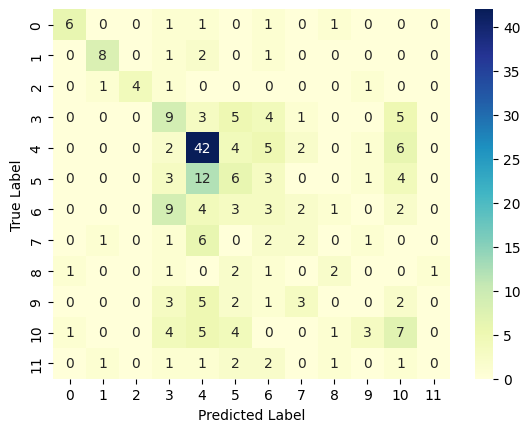

In [39]:
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, pred_ensemble)

import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(conf_matrix, annot = True, fmt = "d", cmap = "YlGnBu")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()